
# Project: Investigate a Dataset (IMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

    This data set contains information about 10,000 movies collected from The Movie Database (TMDb),                               including user ratings and revenue.
    ● Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|) characters.
    
    ● There are some odd characters in the ‘cast’ column.
    
    ● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
    accounting for inflation over time.
    
    the questions i will discuss is...
    does budget affect the popularity?
    does budget affect the revenue?
    does more popularity means more revenue?
    Which genres are most popular from year to year?
    which production company are most popular?
    What kinds of properties are associated with movies that have high revenues?
    what is the most popular release year?
    what is the most popular release month?


<a id='wrangling'></a>
## Data Wrangling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### drop unnecessary columns
    

In [5]:
df.drop(columns={'id','imdb_id','cast','homepage','director','overview','keywords','tagline','original_title'},inplace=True)

In [6]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   release_date          10866 non-null  object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### it seems we have some data entry errors

In [8]:
df[df['budget']==0]
#how colud we have a movie without budget so i'll drop the 0 budget films so it 
#doesn't affect my analysis

,popularity,budget,revenue,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,3.358321,0,22354572,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,2.272044,0,45895,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,2.165433,0,0,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,2.141506,0,0,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,0.080598,0,0,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,0.065543,0,0,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,0.065141,0,0,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [9]:
#i'm storing it's indices i a numpy array so i could drop it
ind=df[df['budget']==0].index
df.drop(ind,axis=0,inplace=True)

In [10]:
#test
df[df['budget']==0]

,popularity,budget,revenue,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [11]:
#another problem is runutime = 0
df[df['runtime']==0]

,popularity,budget,revenue,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1289,0.037459,3250000,0,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
4063,0.371510,6000000,0,0,Comedy,NaN,1/25/02,49,5.9,2002,7.273568e+06,0.0
6383,0.371630,2000000,0,0,Drama|Family,NaN,11/1/05,11,4.7,2005,2.233127e+06,0.0


In [12]:
#will solve it as i did in the previous one
ind=df[df['runtime']==0].index
df.drop(ind,axis=0,inplace=True)

In [13]:
#test
df[df['runtime']==0]

,popularity,budget,revenue,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [14]:
#last check
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5167.000000,5.167000e+03,5.167000e+03,5167.000000,5167.000000,5167.000000,5167.000000,5.167000e+03,5.167000e+03
mean,0.992748,3.075510e+07,8.032227e+07,107.155409,408.815947,6.032901,2001.249468,3.690673e+07,1.022350e+08
std,1.329408,3.890649e+07,1.595095e+08,22.668905,788.424011,0.883457,11.777895,4.196174e+07,1.959469e+08
min,0.001117,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,0.348090,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.105479e+06,0.000000e+00
50%,0.624900,1.700000e+07,2.100918e+07,103.000000,122.000000,6.100000,2005.000000,2.274082e+07,2.866447e+07
75%,1.152677,4.000000e+07,8.948827e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134339e+08
max,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


###### turning release_date from string to datetime 

In [15]:
df['release_date']=pd.to_datetime(df['release_date'])

In [16]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            5167 non-null   float64       
 1   budget                5167 non-null   int64         
 2   revenue               5167 non-null   int64         
 3   runtime               5167 non-null   int64         
 4   genres                5166 non-null   object        
 5   production_companies  5033 non-null   object        
 6   release_date          5167 non-null   datetime64[ns]
 7   vote_count            5167 non-null   int64         
 8   vote_average          5167 non-null   float64       
 9   release_year          5167 non-null   int64         
 10  budget_adj            5167 non-null   float64       
 11  revenue_adj           5167 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 524.8+ 

In [17]:
df.sample(5)

,popularity,budget,revenue,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2604,0.132643,4250000,0,33,Comedy|History,Tiger Aspect Productions|Sky TV,1999-12-06,15,6.8,1999,5.563475e+06,0.000000e+00
8724,0.632783,83000000,59468275,90,Science Fiction|Comedy|Family|Romance,Universal Pictures|Amblin Entertainment,2000-04-28,55,4.4,2000,1.051022e+08,7.530421e+07
806,0.778247,5500000,5483299,120,Drama|Comedy,Double Feature Films|Wild Bunch|Worldview Ente...,2014-01-18,192,6.3,2014,5.066001e+06,5.050618e+06
6717,0.508401,10000000,7177143,126,Adventure|Drama|War,Metro-Goldwyn-Mayer (MGM),2006-09-09,158,6.6,2006,1.081669e+07,7.763294e+06
6281,0.743639,45000000,50871113,103,Action|Crime,Canal Plus|Current Entertainment|Clubdeal|TF1 ...,2005-02-02,279,6.5,2005,5.024535e+07,5.680082e+07


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
### does budget affect the popularity?
### does budget affect the revenue?
### does more popularity means more revenue?

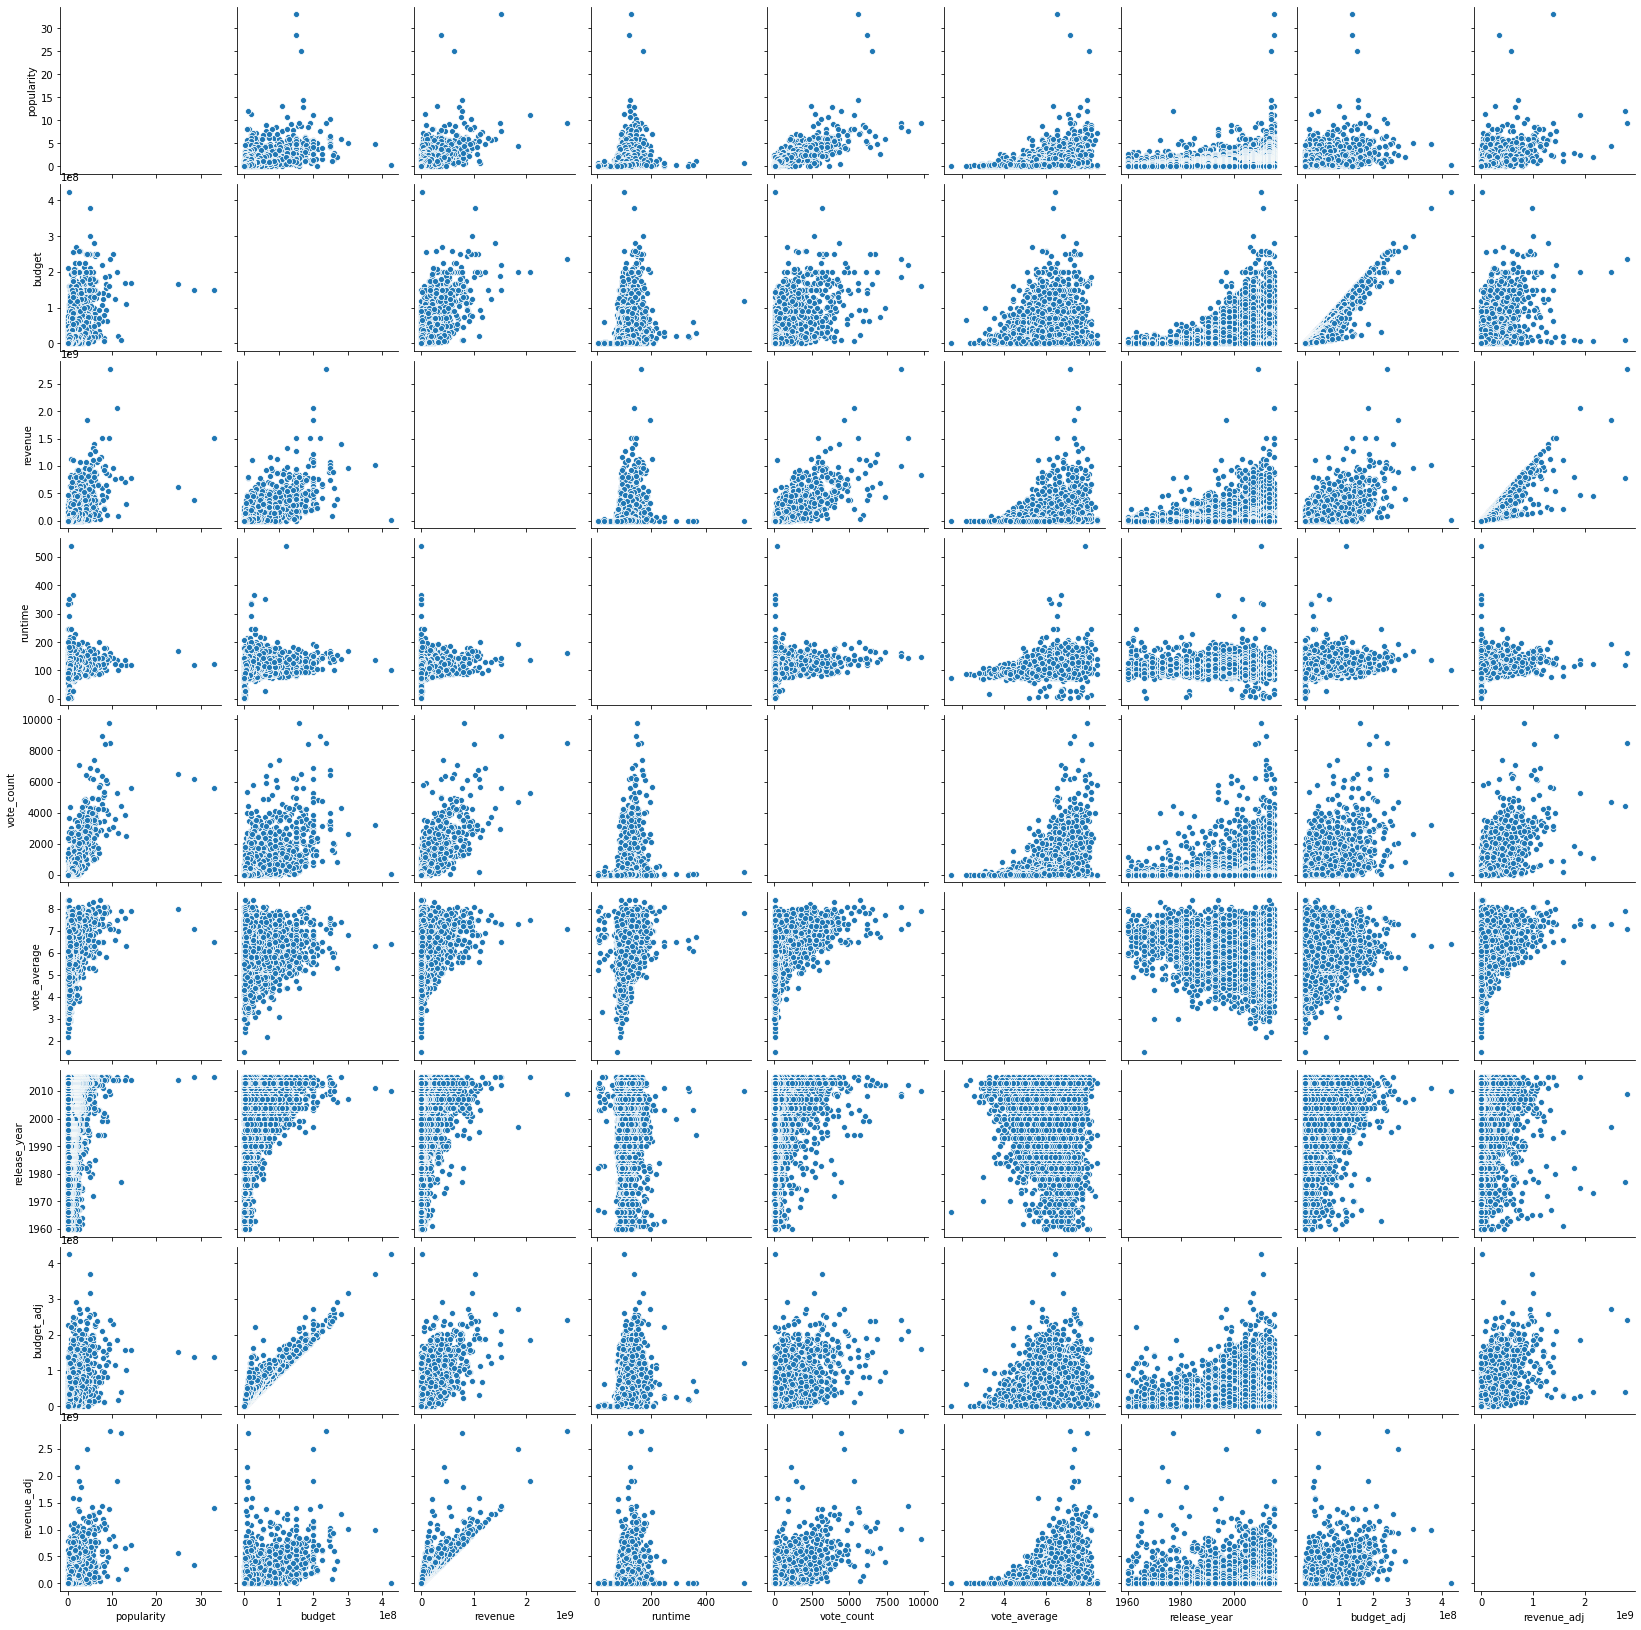

In [18]:
sns.pairplot(df,diag_kind='kda');

#                                      all data scatter pair plot

In [19]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.479847,0.639129,0.201117,0.791835,0.312669,0.144451,0.435207,0.577292
budget,0.479847,1.000000,0.700094,0.265416,0.579968,0.091477,0.215646,0.959120,0.562587
revenue,0.639129,0.700094,1.000000,0.227461,0.771139,0.245804,0.110520,0.667652,0.909700
runtime,0.201117,0.265416,0.227461,1.000000,0.242640,0.331824,-0.108000,0.329267,0.250323
vote_count,0.791835,0.579968,0.771139,0.242640,1.000000,0.365075,0.169401,0.523387,0.679764
vote_average,0.312669,0.091477,0.245804,0.331824,0.365075,1.000000,-0.160019,0.111662,0.277402
release_year,0.144451,0.215646,0.110520,-0.108000,0.169401,-0.160019,1.000000,0.036859,-0.080767
budget_adj,0.435207,0.959120,0.667652,0.329267,0.523387,0.111662,0.036859,1.000000,0.592289
revenue_adj,0.577292,0.562587,0.909700,0.250323,0.679764,0.277402,-0.080767,0.592289,1.000000


### Research Question 2 (Which genres are most popular from year to year?)

In [20]:
df.genres.mode()

0    Drama
dtype: object

     below I'm trying to visualize the films categories by making a data frame that includes the category and its frequency

In [21]:
c=df.genres.str.split('|')
lists=[]
for i in c:
    lists.append(i)

In [22]:
len(lists)

5167

In [23]:
flat_list=[]
itereator=0
while itereator <= 5166:
    for i in lists[itereator]:
        flat_list.append(i)
        itereator=itereator+1

In [24]:
s=pd.Series(flat_list)
s=s.value_counts()
s=pd.DataFrame(s)
s.reset_index(level=0, inplace=True)
s=s.rename(columns={'index':'categories',0:'frequency'})

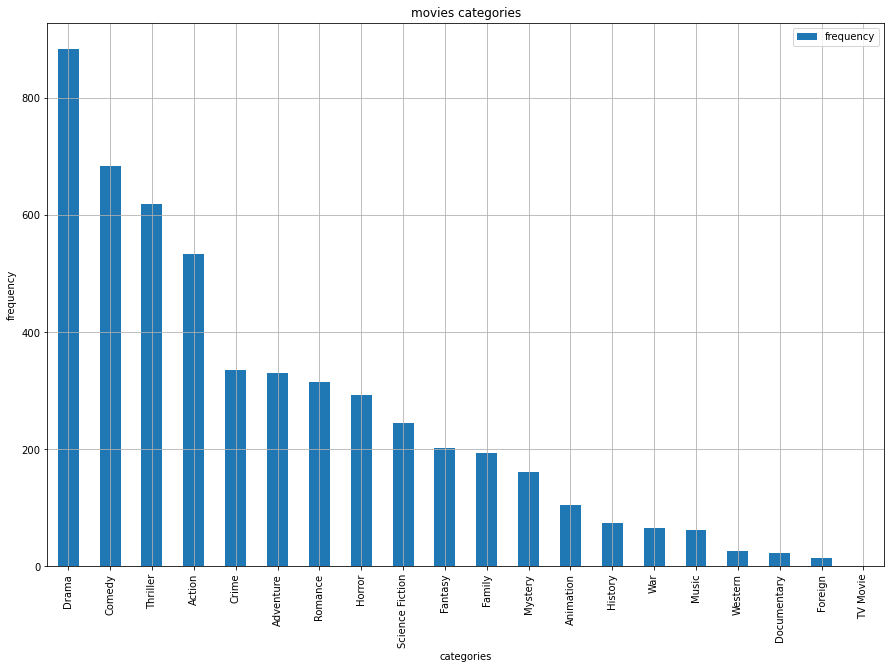

In [25]:
s.plot(kind='bar',x='categories',y='frequency',title='movies categories',ylabel='frequency',grid=True,figsize=(15,10));

### Research Question 3 (which production company are most popular?)

In [26]:
df.production_companies.mode()

0    Paramount Pictures
dtype: object

### Research Question 4 (What kinds of properties are associated with movies that have high revenues?)

In [27]:
high_revenue=df.sort_values(by=['revenue'],ascending=False).head(100)

In [28]:
high_revenue.budget.mean()

154235000.0

In [29]:
high_revenue.runtime.mean()

130.07

In [30]:
high_revenue.genres.mode()

0    Adventure|Fantasy|Action
dtype: object

### Research Question 5 (what is the most popular release year?)

In [31]:
df.release_year.mode()

0    2011
dtype: int64

### Research Question 6 (what is the most popular release month?)

In [32]:
df.release_date.dt.month.mode()

0    9
dtype: int64

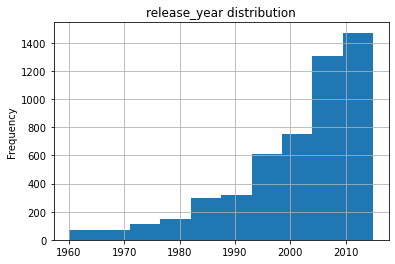

In [35]:
df.release_year.plot(kind='hist',xlabel='release_year',title='release_year distribution',grid=True);

##### it seems that the number of movies is increasing in time increasing

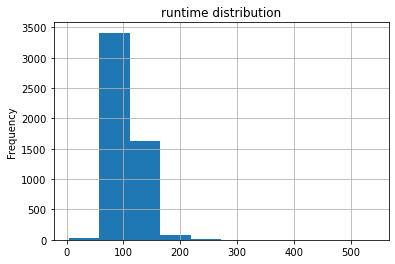

In [37]:
df['runtime'].plot(kind='hist',xlabel='runtime',title='runtime distribution',grid=True);

###### most movies has a (50:100) run time
###### (150:200)is a rar run time

<a id='conclusions'></a>
## Conclusions


##### sources
    i did some search on stackoverflow for pandas syntax help
    got visualization help from (python for data analysis) book

 ### findings summarize and the results 

   
    -i found a positive correlation between budget and popularity, it's not so strong but we can say that if the 
    budget increases there is a chance that the popularity increases
    
    -i found a strong correlation between them , we can say that more budget will cause more revenue
    
    - there is a strong correlation between popularity and revenue so work hard on your movie so you can have a good               popularity and you will get rich
    
    -Drama movies it the most popular movies
    
    -Paramount Pictures is the most popular production company
    
    -the movies with highest revenue usualy have high budget
    they also has a relative long run time
    the most popular movies under the catigories (Adventure|Fantasy|Action)
    
    -most popular release year is 2011
    
    -the most popular release month is September
    
    -the biggest percentage of movies is drama movies
    
    -most movies has a (50:100) run time
    (150:200)is a rar run time
    
    - the number of movies is increasing in time increasing

   ### Limitations
    dealing with string separated with'|' was hard as I had to do a function to make it easy doing visualization to it so
    this has adversely affected my analysis
    
    also, there was illogical data in columns budget forced me to get rid of some rows which of course affected the 
    statistics results